In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
import graphviz
import matplotlib.pyplot as plt

# Preparing data

<Axes: xlabel='x', ylabel='y'>

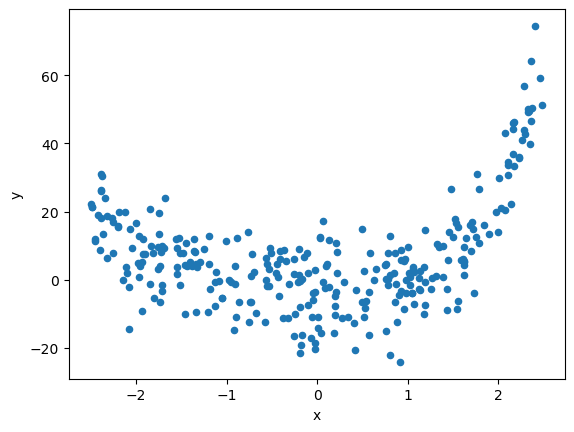

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

# 3. Classification

In [3]:
data_breast_cancer.data
Xb = data_breast_cancer['data'][['mean texture', 'mean symmetry']]
yb = data_breast_cancer['target']
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, 
                                                    yb, 
                                                    test_size=0.2)

In [4]:
f1_list = []
for i in range(1,10):
    depth = i
    tree_clf_temp = DecisionTreeClassifier(max_depth=depth)
    tree_clf_temp.fit(Xb_train, yb_train)
    yb_train_predict_temp = tree_clf_temp.predict(Xb_train)
    yb_test_predict_temp = tree_clf_temp.predict(Xb_test)
    f1_train = f1_score(yb_train, yb_train_predict_temp)
    f1_test = f1_score(yb_test, yb_test_predict_temp)
    f1_list.append((f1_train+f1_test)/2)

f1_list

[0.7605820105820105,
 0.8091569631073628,
 0.8163220023076241,
 0.8106969747618251,
 0.7942073717833686,
 0.7946483747373625,
 0.8227586289348781,
 0.8339675408032277,
 0.8333333333333333]

In [10]:
max_depth = f1_list.index(max(f1_list))+1
# max_depth = 3
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(Xb_train, yb_train)
yb_train_predict, yb_test_predict = tree_clf.predict(Xb_train), tree_clf.predict(Xb_test)

answers_3 = []
answers_3.append(max_depth)
answers_3.append(f1_score(yb_train, yb_train_predict))
answers_3.append(f1_score(yb_test, yb_test_predict))
answers_3.append(accuracy_score(yb_train, yb_train_predict))
answers_3.append(accuracy_score(yb_test, yb_test_predict))

with open('f1acc_tree.pkl', 'wb') as file:
    pickle.dump(answers_3, file)
answers_3

[8, 0.9442508710801394, 0.72, 0.9296703296703297, 0.631578947368421]

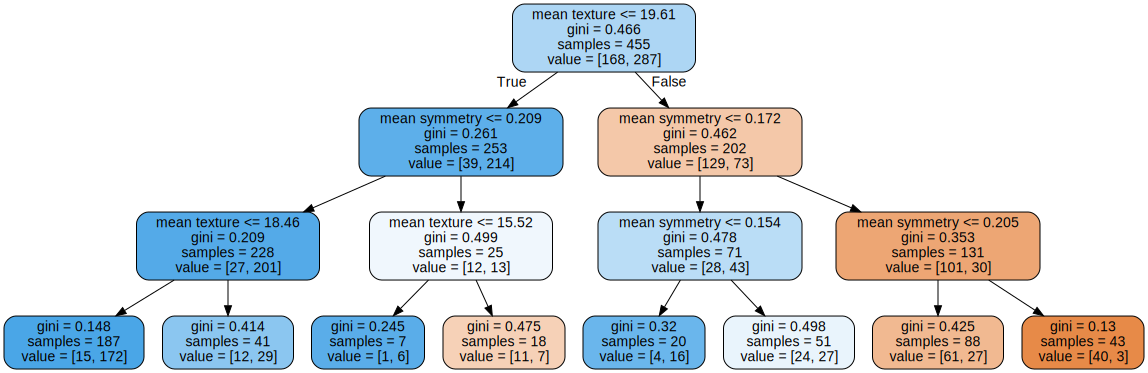

In [6]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=['mean texture', 'mean symmetry'],
                                rounded=True, 
                                filled=True)
graph = graphviz.Source(dot_data)
with open('bc.png', 'wb') as f:
    f.write(graph.pipe(format='png'))
graph

# 4. Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

results_list = []
for i in range(1,10):
    max_depth = i
    clf_temp = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf_temp.fit(X_train, y_train)
    y_train_predict, y_test_predict = clf_temp.predict(X_train), clf_temp.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    results_list.append([max_depth, mse_train, mse_test])
    
best_result = min(results_list, key=lambda x: x[2])
print(best_result)
# print(results_list)
with open('mse_tree.pkl', 'wb') as file:
    pickle.dump(best_result, file)

[3, 76.27010015199527, 70.32079025870786]


In [8]:
# max_depth = mse_list.index(min(mse_list))+1
# # max_depth = 4
# reg_clf = DecisionTreeRegressor(max_depth=max_depth)
# reg_clf.fit(X_train, y_train)
# y_train_predict, y_test_predict = reg_clf.predict(X_train), reg_clf.predict(X_test)
# mse_train = mean_squared_error(y_train, y_train_predict)
# mse_test = mean_squared_error(y_test, y_test_predict)

# answers_4 = []
# answers_4.append(max_depth)
# answers_4.append(mse_train)
# answers_4.append(mse_test)
# with open('mse_tree.pkl', 'wb') as f:
#     pickle.dump(best_result, f)
# 
# with open('mse_tree.pkl', 'wb') as file:
#     pickle.dump(answers_4, file)
# answers_4

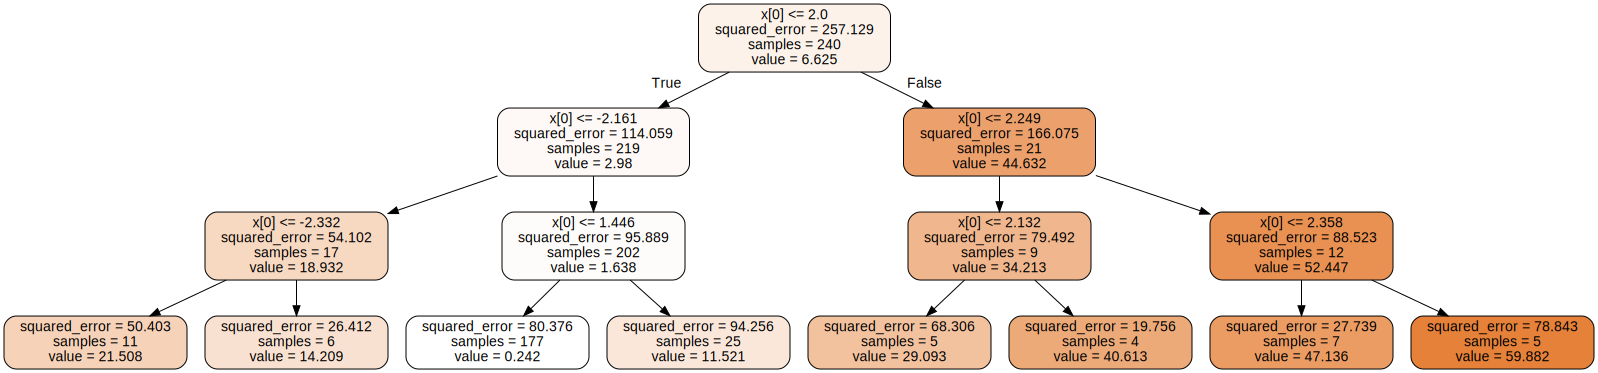

In [9]:
reg_clf = DecisionTreeRegressor(max_depth=best_result[0], random_state=42)
reg_clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(reg_clf, out_file=None, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
with open('reg.png', 'wb') as f:
    f.write(graph.pipe(format='png'))
graph